In [10]:
import pandas as pd
df = pd.read_csv("weatherHistory.csv")
print(df.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [11]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['DayOfYear'] = df['Formatted Date'].dt.dayofyear
print(df[['Formatted Date', 'Year', 'Month', 'DayOfYear']].head())

             Formatted Date  Year  Month  DayOfYear
0 2006-03-31 22:00:00+00:00  2006      3         90
1 2006-03-31 23:00:00+00:00  2006      3         90
2 2006-04-01 00:00:00+00:00  2006      4         91
3 2006-04-01 01:00:00+00:00  2006      4         91
4 2006-04-01 02:00:00+00:00  2006      4         91


In [12]:
X = df[['Year', 'Month', 'DayOfYear']]
y = df['Temperature (C)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 90.28


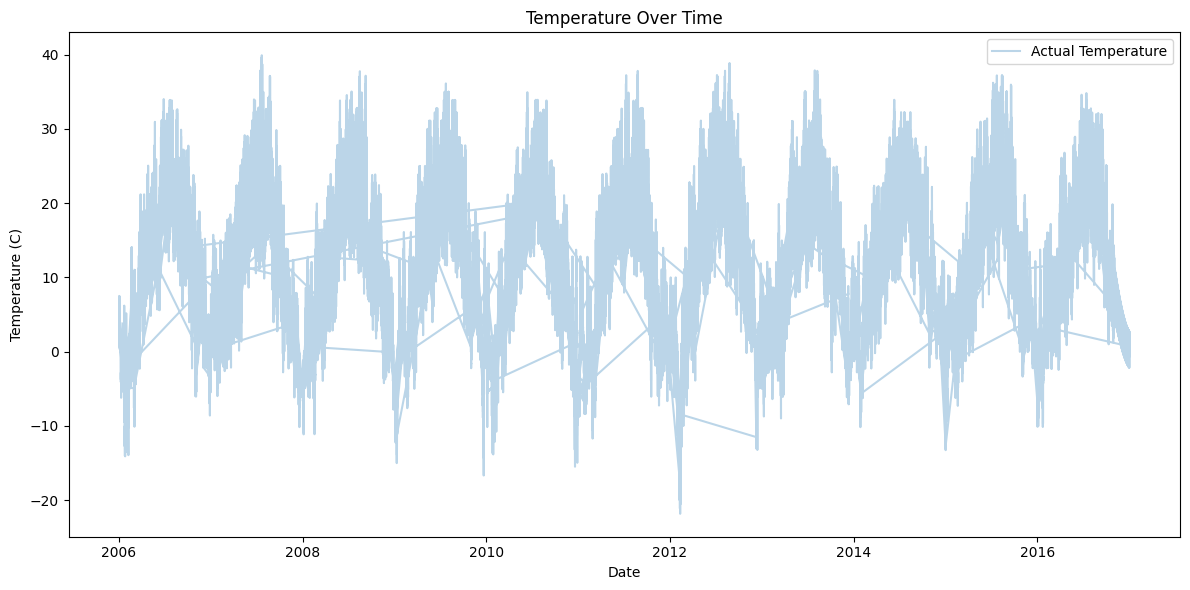

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Formatted Date'], df['Temperature (C)'], alpha=0.3, label='Actual Temperature')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
future_date = pd.to_datetime("2026-01-01")
future_data = pd.DataFrame([{
    'Year': future_date.year,
    'Month': future_date.month,
    'DayOfYear': future_date.dayofyear
}])
future_temp = model.predict(future_data)
print(f"Predicted temperature on {future_date.date()}: {future_temp[0]:.2f} °C")


Predicted temperature on 2026-01-01: 10.93 °C
